In [3]:
import sys
sys.path.append('/u/ajagadish/ermi/decisionmaking/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import json
from collections import Counter, defaultdict
from wordcloud import WordCloud
from mycolorpy import colorlist as mcp
import math
FONTSIZE=20
SYS_PATH = '/u/ajagadish/ermi' #'/raven/u/ajagadish/vanilla-llama/'
PARADIGM_PATH = f"{SYS_PATH}/decisionmaking"
from plots import plot_decisionmaking_data_statistics, model_comparison_binz2022, model_simulation_binz2022, model_ginis_binz2022
from utils import save_real_data_openML, save_real_data_lichtenberg2017, induce_pseudo_condition_llm_generated_data


/u/ajagadish/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
def gini_compute(x):
    mad = np.abs(np.subtract.outer(x, x)).mean()
    rmad = mad/np.mean(x)
    return 0.5 * rmad

/raven/u/ajagadish/ermi/decisionmaking/plots.py:614: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  dark_patch = mpatches.Patch(color='#407193', alpha=1.0, hatch='', edgecolor='white', label='ERMI')
/raven/u/ajagadish/ermi/decisionmaking/plots.py:615: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  light_patch = mpatches.Patch(color='#CA8243', alpha=1.0, hatch='', edgecolor='white', label='MI')


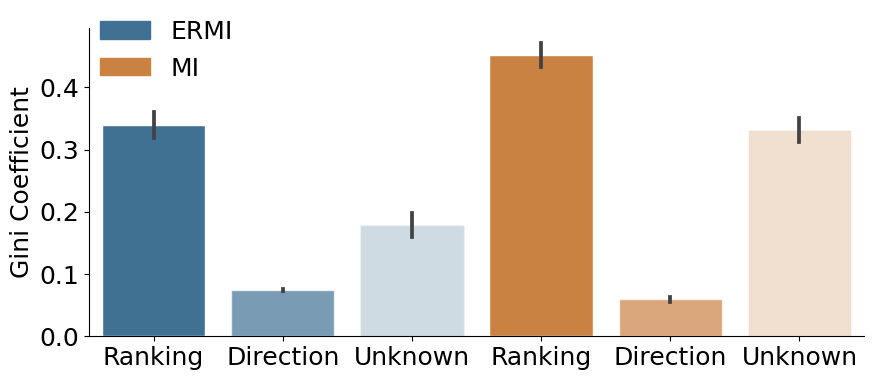

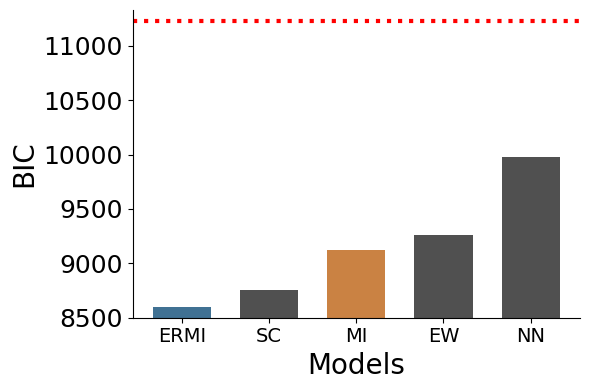

/raven/u/ajagadish/ermi/decisionmaking/plots.py:741: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  posterior_model_frequency(np.array(bics), models, colors, horizontal=False, FIGSIZE=(6,4), task_name=f'Binz2022_exp{experiment_id}')
/raven/u/ajagadish/ermi/decisionmaking/plots.py:741: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  posterior_model_frequency(np.array(bi

ERMI: 0.6284231590495747 +- 0.08973283953121866
EW: 0.3499352626206745 +- 0.08856724984250457
MI: 0.007336383737914879 +- 0.015846854590069
SC: 0.007161903249987133 +- 0.01565865453310301
NN: 0.00714329134184882 +- 0.015638441507425938


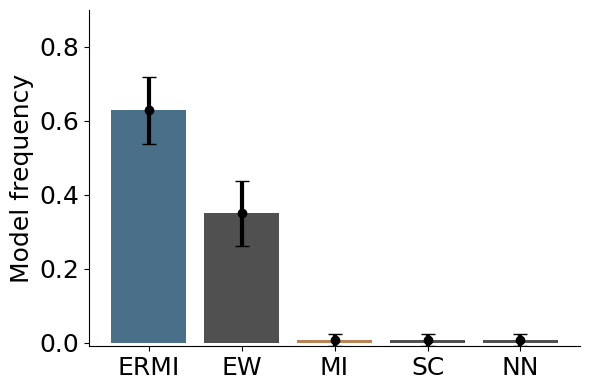

/raven/u/ajagadish/ermi/decisionmaking/plots.py:743: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  exceedance_probability(np.array(bics), models, colors, horizontal=False, FIGSIZE=(6,4), task_name=f'Binz2022_exp{experiment_id}')
/raven/u/ajagadish/ermi/decisionmaking/plots.py:743: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  exceedance_probability(np.array(bics), m

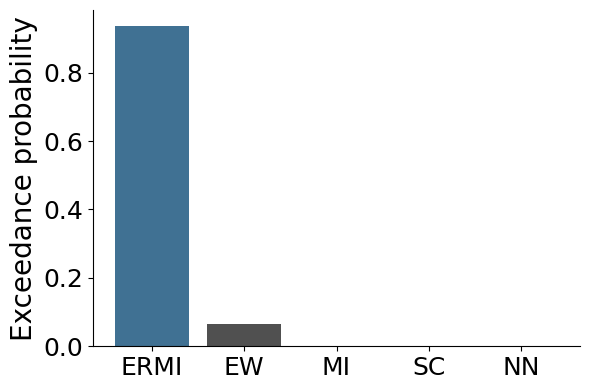

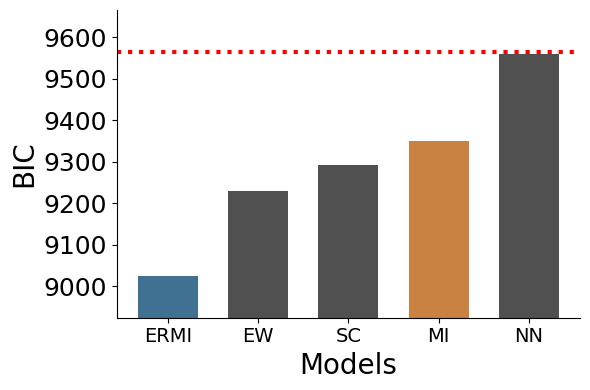

ERMI: 0.729886146166681 +- 0.08880368456334037
MI: 0.10978328657980056 +- 0.06252388873623839
NN: 0.07820438490815267 +- 0.05369858809663068
SC: 0.07375623215222568 +- 0.052274755043302756
EW: 0.008369950193140133 +- 0.01822075094709819


/raven/u/ajagadish/ermi/decisionmaking/plots.py:741: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  posterior_model_frequency(np.array(bics), models, colors, horizontal=False, FIGSIZE=(6,4), task_name=f'Binz2022_exp{experiment_id}')
/raven/u/ajagadish/ermi/decisionmaking/plots.py:741: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  posterior_model_frequency(np.array(bi

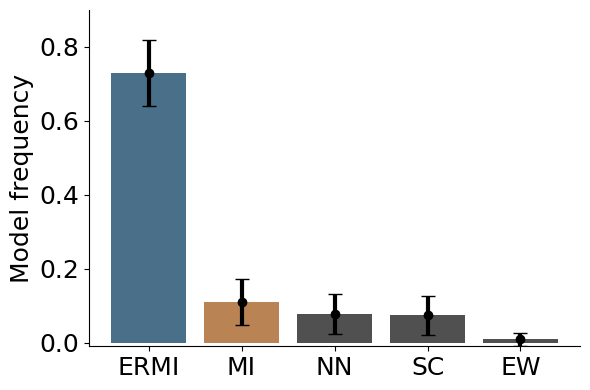

/raven/u/ajagadish/ermi/decisionmaking/plots.py:743: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  exceedance_probability(np.array(bics), models, colors, horizontal=False, FIGSIZE=(6,4), task_name=f'Binz2022_exp{experiment_id}')
/raven/u/ajagadish/ermi/decisionmaking/plots.py:743: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  exceedance_probability(np.array(bics), m

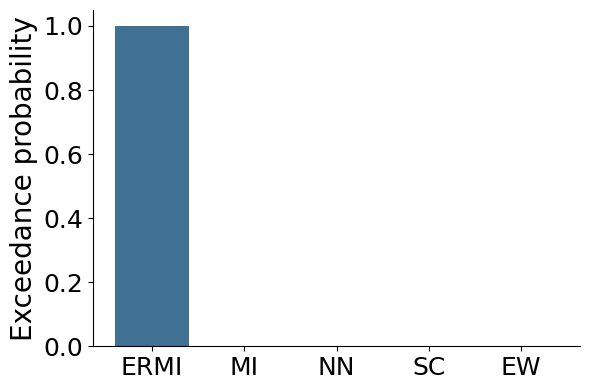

In [5]:
# # plot data statistics for 2D data
# plot_decisionmaking_data_statistics(0, dim=2, condition='unknown')
# plot_decisionmaking_data_statistics(2, dim=2, condition='real')
# plot_decisionmaking_data_statistics(1, dim=2, condition='synthetic')

# plot data statistics for 4D data
# plot_decisionmaking_data_statistics(0, dim=4, condition='ranked')  #llm
# plot_decisionmaking_data_statistics(0, dim=4, condition='direction')  #llm
# plot_decisionmaking_data_statistics(0, dim=4, condition='unknown')   #llm
# plot_decisionmaking_data_statistics(1, dim=4, condition='ranked') #synthetic
# plot_decisionmaking_data_statistics(1, dim=4, condition='direction')   #synthetic
# plot_decisionmaking_data_statistics(2, dim=4, condition='openML', method='random')
# plot_decisionmaking_data_statistics(2, dim=4, condition='lichtenberg2017', method='random')

# model simulations
# model_simulation_binz2022(experiment_id=1, source='claude', condition='ranked')
# model_simulation_binz2022(experiment_id=2, source='claude', condition='direction')
# model_simulation_binz2022(experiment_id=3, source='claude', condition='unknown')
# # model_simulation_binz2022(experiment_id=1, source='claude', condition='pseudoranked')
# # model_simulation_binz2022(experiment_id=2, source='claude', condition='pseudodirection')
# model_simulation_binz2022(experiment_id=1, source='synthetic', condition='ranked')
# model_simulation_binz2022(experiment_id=2, source='synthetic', condition='direction')

# model ginis
# model_ginis_binz2022(pseudo=True)
model_ginis_binz2022()

# model comparison
# model_comparison_binz2022(experiment_id=1)
# model_comparison_binz2022(experiment_id=2)
# model_comparison_binz2022(experiment_id=1, pseudo=True)
# model_comparison_binz2022(experiment_id=2, pseudo=True)
model_comparison_binz2022(experiment_id=3)
model_comparison_binz2022(experiment_id=4)
